In [2]:
import skimage.transform as trans
import numpy as np
import os

import scipy as sp
import scipy.misc
import pandas as pd

import matplotlib.pyplot as plt
import imreg_dft as ird

In [4]:


def translate_and_patch(A_file, H_file):
    # the TEMPLATE
    im0 = sp.misc.imread(A_file, True)
    # the image to be transformed
    im1 = sp.misc.imread(H_file, True)
    
    im1 = im1[0:im0.shape[0], 0:im0.shape[1]]
    result = ird.similarity(im0, im1, numiter=5)
    im1 = sp.misc.imread(H_file)
    im0 = sp.misc.imread(A_file)
    translated = ird.imreg.transform_img_dict(im1, result, bgval=255, order=1, invert=False)
    return im0, translated


In [52]:
import cv2

def write_patch(out_dir, image, name, max_per_image, size):
    width = int(image.shape[0])
    height = int(image.shape[1])
    num_x_patches = min(int(width / size), max_per_image)
    num_y_patches = min(int(height/ size), max_per_image)
    print("Generating for %s ..."%(name))
    
    for patch_x in range(0,num_x_patches - 1):
        for patch_y in range(0, num_y_patches - 1):
            patch = image[patch_x * size: patch_x * size + size, patch_y * size : patch_y * size + size]
            ret2, otso = cv2.threshold(cv2.cvtColor(np.asarray(patch), cv2.COLOR_BGR2GRAY),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            print("Writing patch (%i, %i)" % (patch_x, patch_y))
            plt.imsave(out_dir + "/" + name + '%d_%d' % (patch_x, patch_y) + '.jpg', patch)

In [42]:
for i in ["03", "04", "05", "07", "10", "11", "12"]:
    try:
        orig, translated = translate_and_patch('/home/amir/A/A' + i +'/frames/x40/A'+ i +'_00Aa.tiff','/home/amir/H/H'+ i + '/frames/x40/H'+ i + '_00Aa.tiff')
        write_patch("aligned_test", translated, "H"+ i, 100, 256)
        write_patch("aligned_test", orig, "A"+i, 100, 256)
    except Exception as ex:
        print(ex)

/home/shared/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()
/home/shared/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]
/home/shared/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
/home/shared/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be remov

Generating for H03 ...
Writing patch (0, 0)
Writing patch (0, 1)
Writing patch (0, 2)
Writing patch (0, 3)
Writing patch (0, 4)
Writing patch (1, 0)
Writing patch (1, 1)
Writing patch (1, 2)
Writing patch (1, 3)
Writing patch (1, 4)
Writing patch (2, 0)
Writing patch (2, 1)
Writing patch (2, 2)
Writing patch (2, 3)
Writing patch (2, 4)
Writing patch (3, 0)
Writing patch (3, 1)
Writing patch (3, 2)
Writing patch (3, 3)
Writing patch (3, 4)
Generating for A03 ...
Writing patch (0, 0)
Writing patch (0, 1)
Writing patch (0, 2)
Writing patch (0, 3)
Writing patch (0, 4)
Writing patch (1, 0)
Writing patch (1, 1)
Writing patch (1, 2)
Writing patch (1, 3)
Writing patch (1, 4)
Writing patch (2, 0)
Writing patch (2, 1)
Writing patch (2, 2)
Writing patch (2, 3)
Writing patch (2, 4)
Writing patch (3, 0)
Writing patch (3, 1)
Writing patch (3, 2)
Writing patch (3, 3)
Writing patch (3, 4)
Generating for H04 ...
Writing patch (0, 0)
Writing patch (0, 1)
Writing patch (0, 2)
Writing patch (0, 3)
Writing

In [19]:
results = "/home/amir/project/pytorch-CycleGAN-and-pix2pix/aligned_test_mitos/all_stain_cyclegan/test_1/images/"

metrics_raw = pd.DataFrame(columns=['file', 'ssim_in_b','ssim_in_a', 'mse_in_a', 'mse_in_b', 'real_ssim'])

from skimage.measure import compare_ssim as ssim
def mse(x, y):
    return np.linalg.norm(x - y)

for file in os.listdir(results):
    if "real_A" in file:
            prefix = file[:7]
            path = results + prefix
            fake_B = plt.imread(path + "fake_B.png")
            real_B = plt.imread(path + "real_B.png")
            
            real_A = plt.imread(path + "real_A.png")
            fake_A = plt.imread(path + "fake_A.png")
        
            
            metrics_raw = metrics_raw.append({'file': prefix, 
                         'ssim_in_b':ssim(real_B, fake_B, multichannel=True),'ssim_in_a':ssim(real_A, fake_A, multichannel=True), 'real_ssim_a': ssim(real_A, real_B, multichannel=True), 
                         'mse_in_a':mse(real_A, fake_A), 'mse_in_b':mse(real_B, fake_B)}, ignore_index=True)

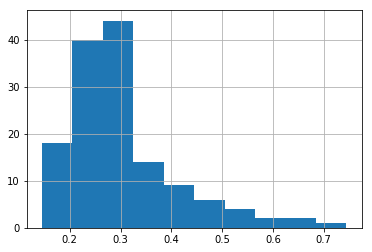

In [21]:
metrics['ssim_in_a'].hist()

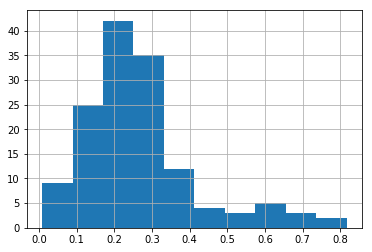

In [23]:
metrics['real_ssim'].hist()

In [44]:
metrics.mean()

ssim_in_b     0.407573
ssim_in_a     0.303341
mse_in_a     75.142761
mse_in_b     64.877912
real_ssim     0.332233
dtype: float64

In [45]:
metrics.std()

ssim_in_b     0.111630
ssim_in_a     0.107964
mse_in_a     11.871704
mse_in_b     12.560729
real_ssim     0.108228
dtype: float64

In [49]:
metrics[metrics['ssim_in_b']<.3]

,file,ssim_in_b,ssim_in_a,mse_in_a,mse_in_b,real_ssim
1,A071_3_,0.295156,0.169298,85.129196,66.912254,0.214100
4,A030_0_,0.248337,0.189377,92.980774,85.005455,0.200193
13,A032_1_,0.276156,0.208775,87.349594,80.373642,0.221172
19,A122_4_,0.261320,0.192311,95.614548,86.471390,0.197667
25,A100_0_,0.172340,0.145383,98.411781,98.065018,0.133835
27,A052_4_,0.283416,0.196398,83.344368,71.634117,0.221884
43,A031_0_,0.285714,0.221892,90.435555,82.127159,0.234530
48,A030_3_,0.294965,0.222473,86.085663,77.342354,0.236402
55,A032_3_,0.295797,0.230047,85.515106,77.808449,0.239974
73,A052_3_,0.274190,0.174483,83.054962,70.202492,0.210809


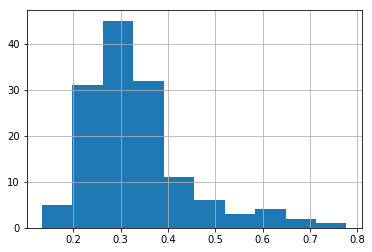

In [39]:
metrics['real_ssim'].hist()

In [15]:
ssim(plt.imread(results + "A100_0_fake_B.png"), plt.imread(results + "A050_4_real_B.png"), multichannel=True)

0.6583708677366209

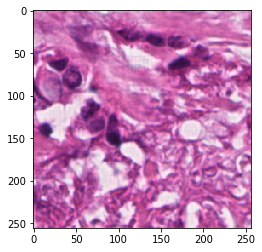

In [51]:
plt.imshow(plt.imread(results + "A122_4_fake_B.png"))

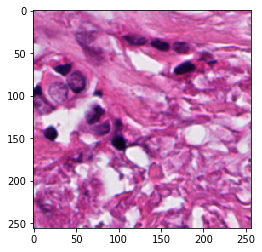

In [50]:
plt.imshow(plt.imread(results + "A122_4_real_B.png"))

In [54]:
im1, im2 = translate_and_patch(results + "A122_4_real_B.png", results + "A122_4_fake_B.png")

/home/shared/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
/home/shared/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
/home/shared/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
/home/shared/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is ad

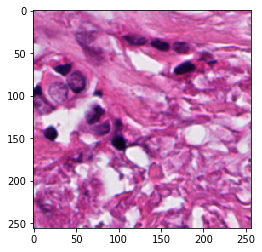

In [56]:
plt.imshow(im1)

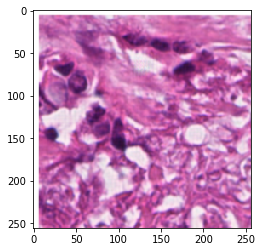

In [57]:
plt.imshow(im2)

In [60]:
ssim(im2[10:,10:], im1[10:,10:],  multichannel=True)

0.6947587705112254

In [22]:


#alignment

results = "/home/amir/project/pytorch-CycleGAN-and-pix2pix/aligned_test_mitos/all_stain_cyclegan/test_1/images/"

metrics = pd.DataFrame(columns=['file', 'ssim_in_b','ssim_in_a', 'mse_in_a', 'mse_in_b', 'real_ssim'])

from skimage.measure import compare_ssim as ssim
def mse(x, y):
    return np.linalg.norm(x - y)

def cut_around(x):
    return x[10:246, 10:246]

for file in os.listdir(results):
    if "real_A" in file:
            prefix = file[:7]
            path = results + prefix
            
            fake_B, real_B = translate_and_patch(path + "fake_B.png", path + "real_B.png")
            
            fake_B = cut_around(fake_B)
            real_B = cut_around(real_B)
            
            
            fake_A, real_A = translate_and_patch(path + "fake_A.png", path + "real_A.png")

            fake_A = cut_around(fake_A)
            real_A = cut_around(real_A)
        
            
            metrics = metrics.append({'file': prefix, 
                         'ssim_in_b':ssim(real_B, fake_B, multichannel=True),'ssim_in_a':ssim(real_A, fake_A, multichannel=True), 'real_ssim': ssim(real_A, real_B, multichannel=True), 
                         'mse_in_a':mse(real_A, fake_A), 'mse_in_b':mse(real_B, fake_B)}, ignore_index=True)

/home/shared/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
/home/shared/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
/home/shared/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
/home/shared/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is ad

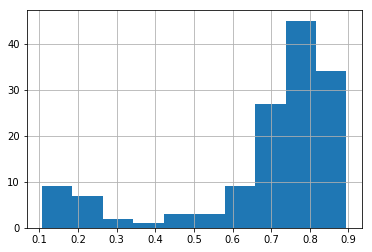

In [17]:
metrics['ssim_in_b'].hist()

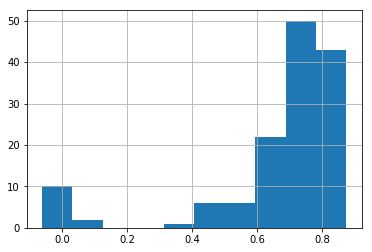

In [18]:
metrics['ssim_in_a'].hist()

In [5]:
#Resenet 6 block data

results = "/home/amir/project/pytorch-CycleGAN-and-pix2pix/aligned_test_resnet6blocks/all_stain_cyclegan_resnet6/test_latest/images/"

metrics_resnet6 = pd.DataFrame(columns=['file', 'ssim_in_b','ssim_in_a', 'mse_in_a', 'mse_in_b', 'real_ssim'])

from skimage.measure import compare_ssim as ssim
def mse(x, y):
    return np.linalg.norm(x - y)

def cut_around(x):
    return x[10:246, 10:246]

for file in os.listdir(results):
    if "real_A" in file:
            prefix = file[:7]
            path = results + prefix
            
            fake_B, real_B = translate_and_patch(path + "fake_B.png", path + "real_B.png")
            
            fake_B = cut_around(fake_B)
            real_B = cut_around(real_B)
            
            
            fake_A, real_A = translate_and_patch(path + "fake_A.png", path + "real_A.png")

            fake_A = cut_around(fake_A)
            real_A = cut_around(real_A)
        
            
            metrics_resnet6 = metrics_resnet6.append({'file': prefix, 
                         'ssim_in_b':ssim(real_B, fake_B, multichannel=True),'ssim_in_a':ssim(real_A, fake_A, multichannel=True), 'real_ssim': ssim(real_A, real_B, multichannel=True), 
                         'mse_in_a':mse(real_A, fake_A), 'mse_in_b':mse(real_B, fake_B)}, ignore_index=True)

/home/shared/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
/home/shared/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
/home/shared/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
/home/shared/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is ad

In [66]:
metrics.mean()

ssim_in_b        0.680365
ssim_in_a        0.661821
mse_in_a     58338.498939
mse_in_b     77778.806926
real_ssim        0.263698
dtype: float64

In [67]:
metrics.std()

ssim_in_b        0.208481
ssim_in_a        0.227731
mse_in_a     12829.056407
mse_in_b      7715.252744
real_ssim        0.150704
dtype: float64

In [6]:
metrics_resnet6.mean()

ssim_in_b        0.677554
ssim_in_a        0.681239
mse_in_a     65191.403740
mse_in_b     74175.480219
real_ssim        0.260363
dtype: float64

In [7]:
metrics_resnet6.std()

ssim_in_b        0.219358
ssim_in_a        0.227739
mse_in_a     12599.389415
mse_in_b      8538.201357
real_ssim        0.144900
dtype: float64

In [28]:
metrics_resnet6[metrics_resnet6['ssim_in_b']<.2]

,file,ssim_in_b,ssim_in_a,mse_in_a,mse_in_b,real_ssim
29,A041_1_,0.094689,-0.064344,55165.409561,80558.161058,0.168158
37,A040_3_,0.185912,0.024987,45945.184644,81445.943337,0.149312
44,A043_1_,0.161130,0.027572,53862.606621,82454.524006,0.191172
57,A122_1_,0.122003,0.728067,71482.716771,59266.787816,0.111268
70,A042_0_,0.185867,0.068054,51923.643613,80658.827415,0.261800
78,A040_0_,0.051730,-0.037549,50490.822285,79112.340744,0.144677
79,A043_0_,0.137269,0.031186,54084.851789,80601.986346,0.223480
83,A041_2_,0.137865,0.043452,51951.593566,81563.896603,0.173924
89,A042_1_,0.135964,0.071315,53904.483079,80971.327530,0.196811
93,A042_2_,0.152926,0.045355,52855.145095,80815.433687,0.204736


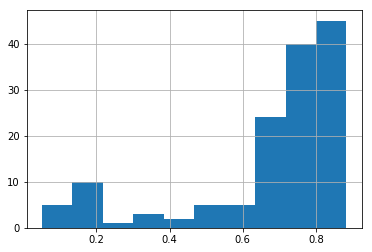

In [29]:
metrics_resnet6['ssim_in_b'].hist()

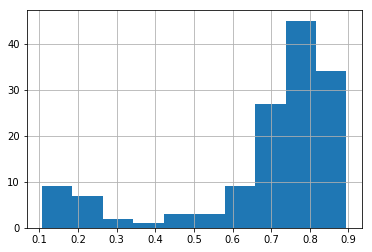

In [30]:
metrics['ssim_in_b'].hist()

# Resnet 6 block param size
[Network G_A] Total number of parameters : 7.838 M

[Network G_B] Total number of parameters : 7.838 M

# Resnet 8 block param size
[Network G_A] Total number of parameters : 11.378 M

[Network G_B] Total number of parameters : 11.378 M

In [9]:
7.838 / 11.378 * 100

68.88732641940587